In [168]:
from matplotlib import pyplot as plt
import os
import json
import yaml
import pandas as pd
import numpy as np
import scipy as sp
import scienceplots

In [169]:
plt.style.use(['science', 'ieee'])

In [170]:
def get_test_name(res_dir):
    filepath = f"../{res_dir}/EXPERIMENT_DATA/TEST_CONFIG"
    with open(filepath) as file:
        name = file.read().strip()
    return name

def list_results_directories():
    path = "../"
    return [(res_dir, get_test_name(res_dir)) for res_dir in os.listdir(path) if res_dir.startswith("results-")]

def plot_smt(df_off, df_on, x, y, xlabel, ylabel, ylim=[0, 26]):
    ax = df_off.plot(
        x=x, y=y,
        xlabel=xlabel, ylabel=ylabel,
        color='blue', style='-', marker='x', ms=3,
        label="SMT OFF"
    )
    ax = df_on.plot(
        ax=ax,
        x=x, y=y,
        xlabel=xlabel, ylabel=ylabel,
        color='red', style='-', marker='o', ms=3,
        label="SMT ON", grid=True, ylim=ylim,
    )

In [171]:
res_dirs = list_results_directories()

In [172]:
list(enumerate(res_dirs))

[(0, ('results-b256e697', 'rss__1g')),
 (1, ('results-7d02f9d7', 'default')),
 (2, ('results-cdc892f3', 'irqbalance-rss')),
 (3, ('results-310e8808', 'irqbalance')),
 (4, ('results-a5d831ea', 'irqbalance__1g')),
 (5, ('results-965d3776', 'rss')),
 (6, ('results-4026b4fa', 'irqbalance-rss__1g')),
 (7, ('results-6a605189', 'default__1g'))]

In [173]:
net = pd.read_csv(f"../{res_dirs[2][0]}/summary/server/throughput-sar.csv")

In [174]:
net[['rxkB/s', 'txkB/s']] *= 8e-6
net['client'] *= 10

In [175]:
net_wg = net[net.iface == 'wg']
net_phy = net[net.iface == "ens10f0np0"]

In [176]:
keep = ['cpu', 'client']
t = net_wg.groupby(keep + ['run']).mean(numeric_only=True).reset_index()
net_wg_df = t.groupby(keep).mean(numeric_only=True).reset_index()

net_wg_18 = net_wg_df[net_wg_df.cpu == 18]
net_wg_36 = net_wg_df[net_wg_df.cpu == 36]

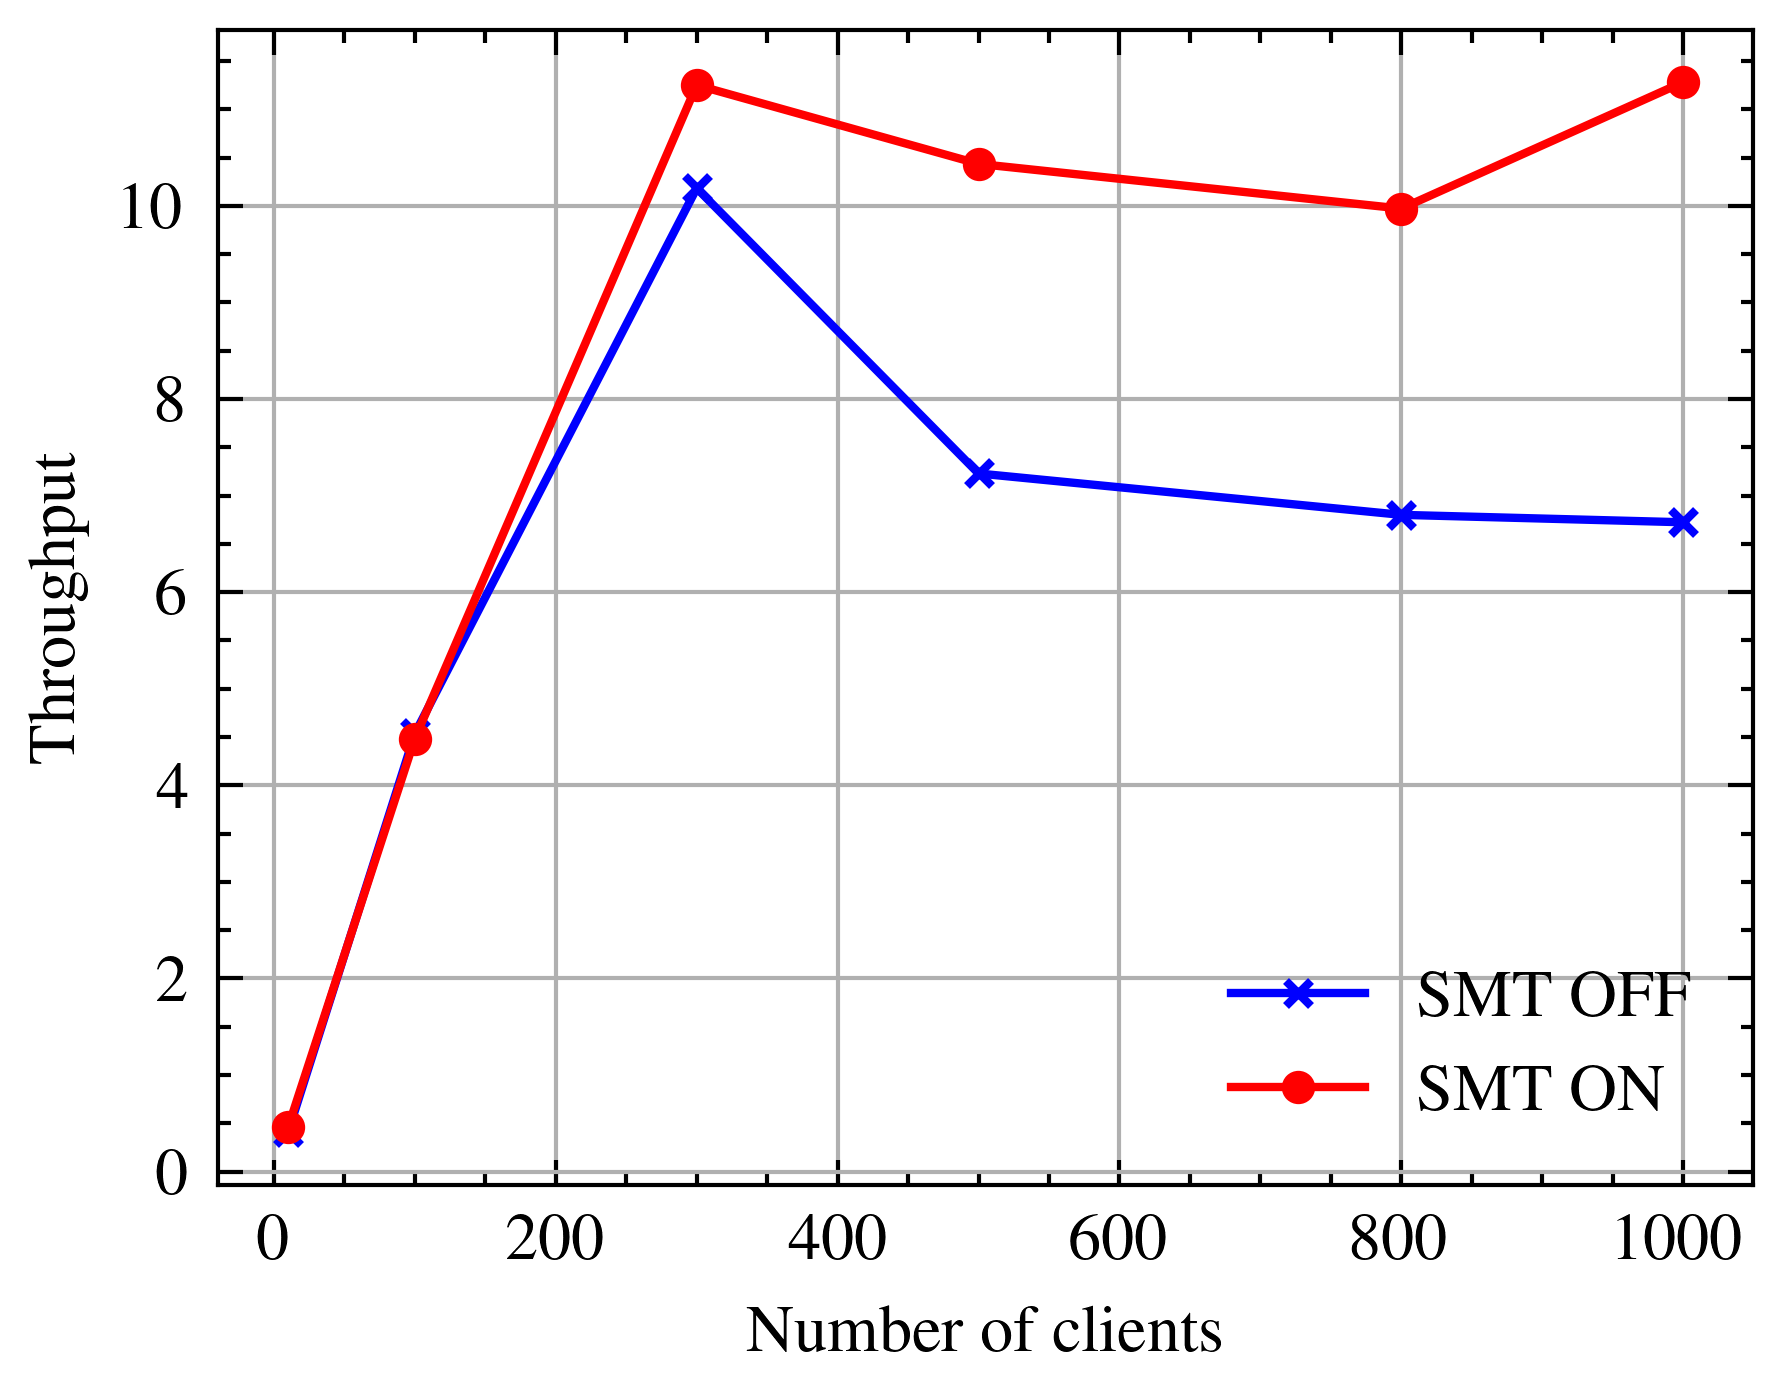

In [177]:
plot_smt(net_wg_18, net_wg_36,
        x='client', y='rxkB/s',
        xlabel="Number of clients", ylabel="Throughput", ylim=None)

In [178]:
cpu = pd.read_csv(f"../{res_dirs[1][0]}/summary/server/cpu-sar.csv")

In [179]:
cpu['used'] = 100 - cpu['idle']
cpu['client'] *= 10

In [180]:
keep = ['cpu', 'client', 'core']
t = cpu.groupby(keep + ['run']).mean(numeric_only=True).reset_index()
cpu_df = t.groupby(keep).mean(numeric_only=True).reset_index()

In [181]:
cpu_global = cpu_df[cpu_df.core == -1]

In [182]:
cpu_18 = cpu_global[cpu_global.cpu == 18]
cpu_36 = cpu_global[cpu_global.cpu == 36]

In [183]:
list(enumerate(res_dirs))

[(0, ('results-b256e697', 'rss__1g')),
 (1, ('results-7d02f9d7', 'default')),
 (2, ('results-cdc892f3', 'irqbalance-rss')),
 (3, ('results-310e8808', 'irqbalance')),
 (4, ('results-a5d831ea', 'irqbalance__1g')),
 (5, ('results-965d3776', 'rss')),
 (6, ('results-4026b4fa', 'irqbalance-rss__1g')),
 (7, ('results-6a605189', 'default__1g'))]

In [184]:
latency_df = []
for i in range(1, 11):
    latency = pd.read_csv(
        f"../{res_dirs[2][0]}/summary/clients/latency-{i}.csv",
        names=['cpu', 'client', 'node', 'run', 'min', 'mean', 'median', '90th', '99th', 'max', 'std'],
        skiprows=1
    )
    # print(latency.dtypes)
    latency[['mean', 'median', '90th', '99th', 'std']] *= 1e-3

    keep = ['cpu', 'client']
    t = latency.groupby(keep + ['run']).mean(numeric_only=True).reset_index()
    lat_df = t.groupby(keep).mean(numeric_only=True).reset_index()

    lat_df['node'] = i
    latency_df.append(lat_df)

In [185]:
latency_df = pd.concat(latency_df, axis=0)

In [186]:
keep = ['cpu', 'client']
t = latency_df.groupby(keep + ['run']).mean(numeric_only=True).reset_index()
lat_df = t.groupby(keep).mean(numeric_only=True).reset_index()

In [187]:
lat_18 = lat_df[lat_df.cpu == 18]
lat_36 = lat_df[lat_df.cpu == 36]

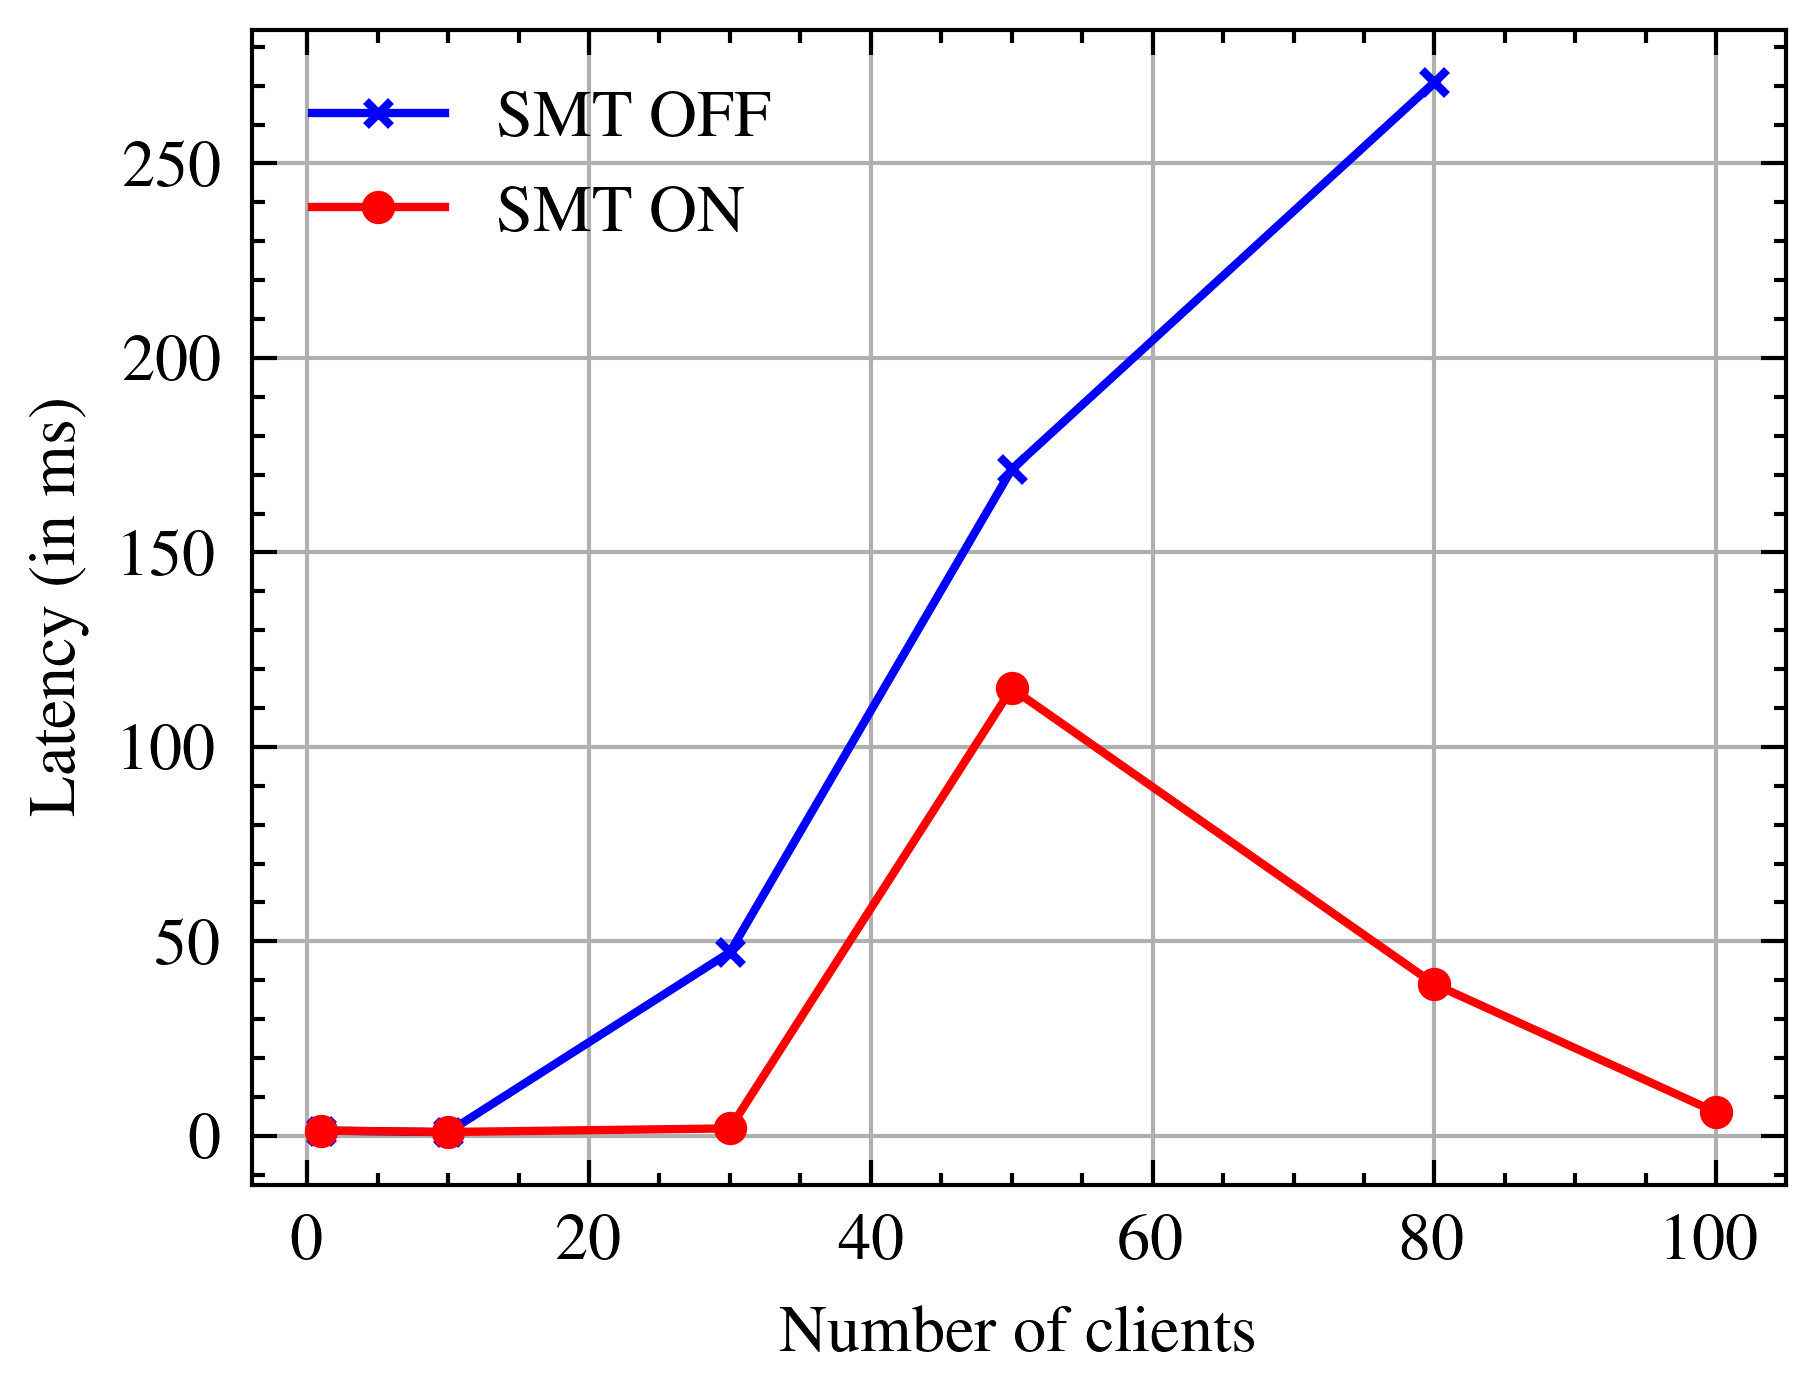

In [188]:
plot_smt(lat_18, lat_36,
        x='client', y='mean',
        xlabel="Number of clients", ylabel="Latency (in ms)", ylim=None)

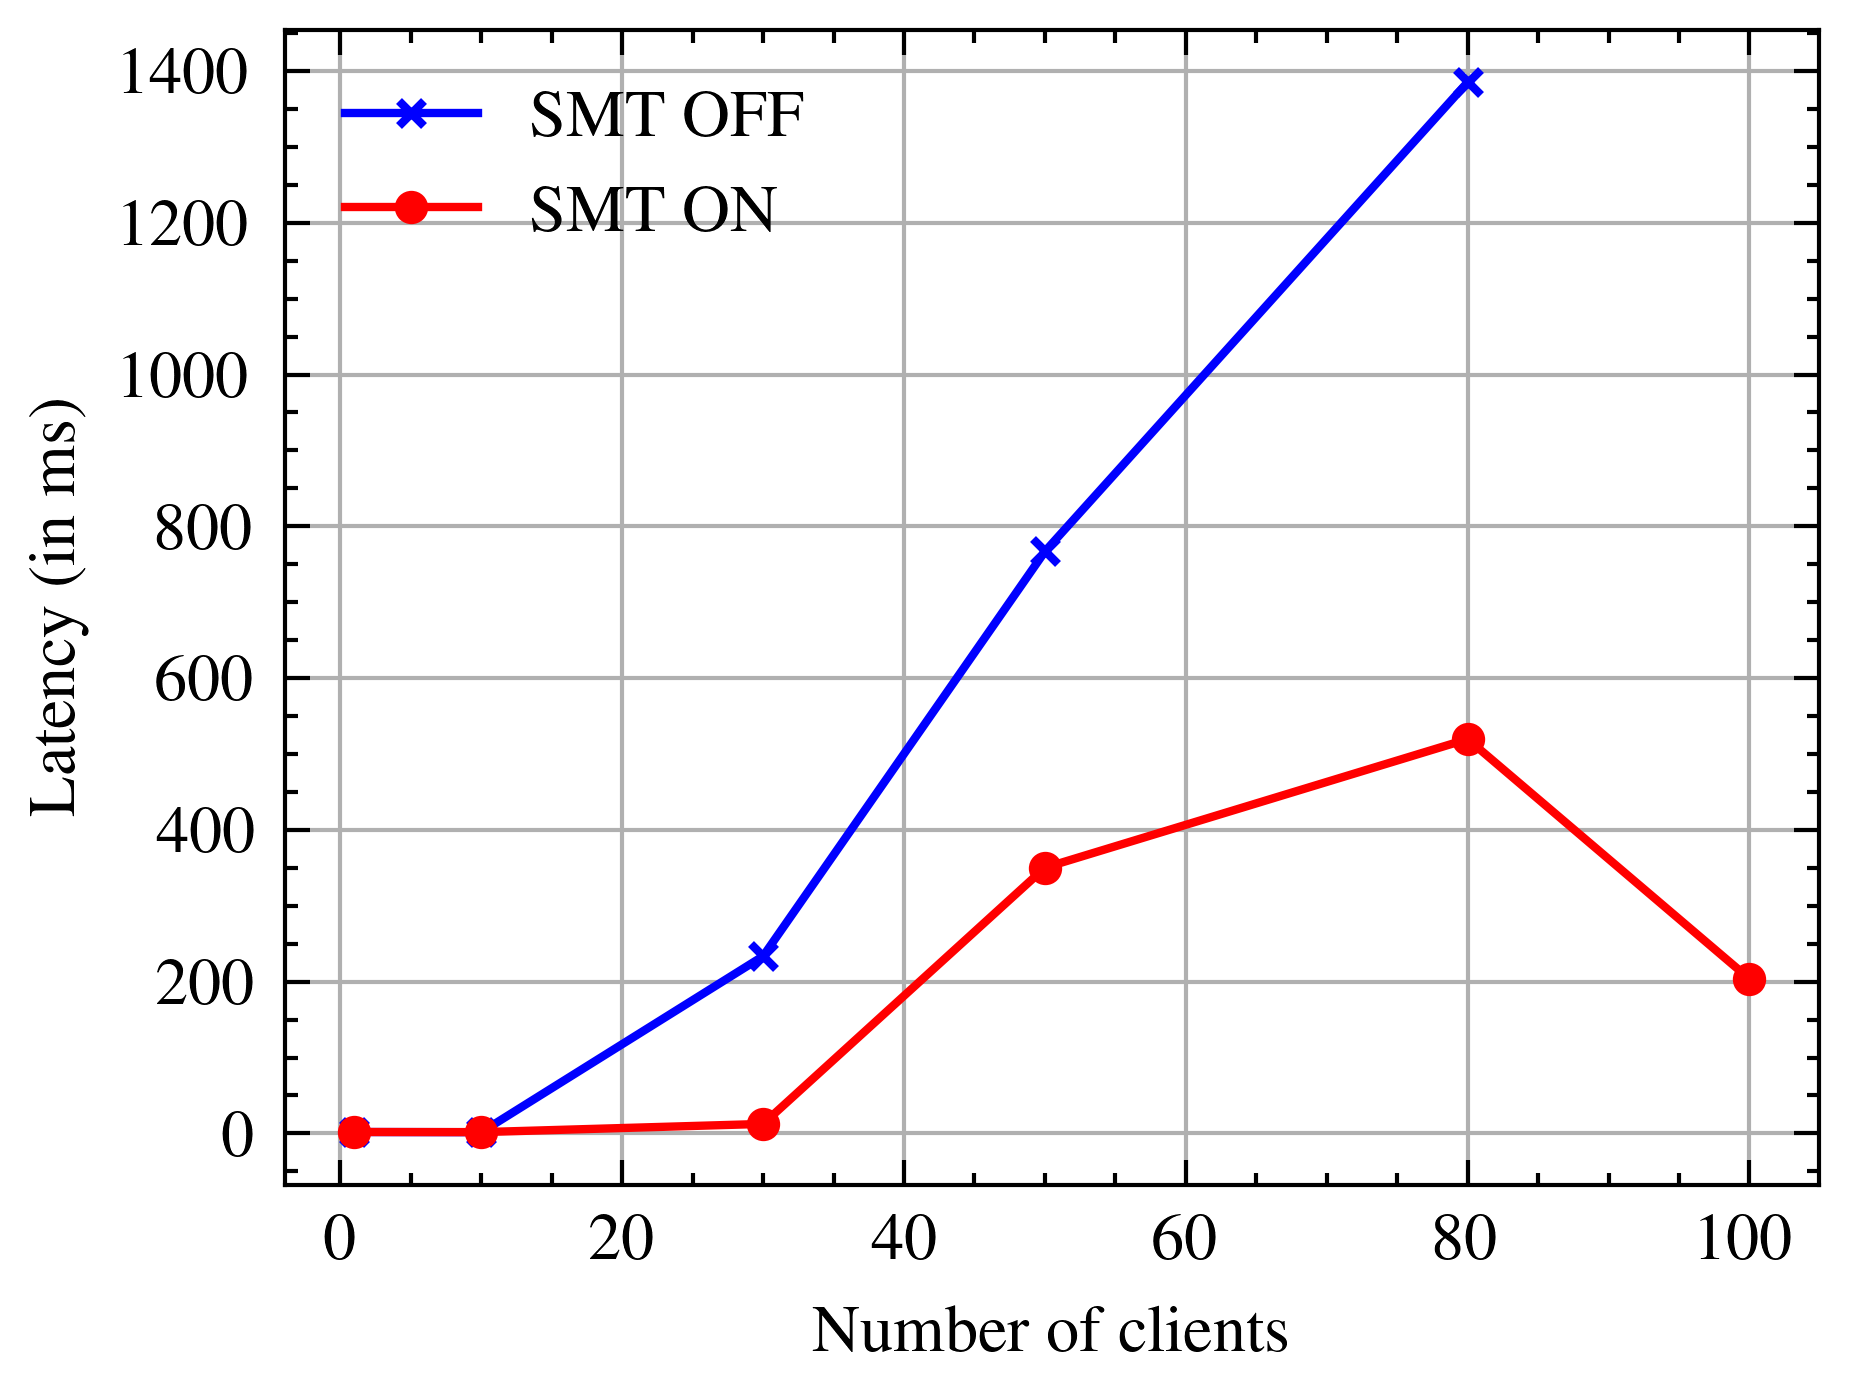

In [189]:
plot_smt(lat_18, lat_36,
        x='client', y='99th',
        xlabel="Number of clients", ylabel="Latency (in ms)", ylim=None)